In [10]:
from __future__ import print_function

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import pickle
import argparse
from argparse import RawTextHelpFormatter
import fnmatch
import os
import cv2
import json
import random
import numpy as np
import shutil
import traceback
import copy

import os
from os import listdir
from os.path import isfile, join

import numpy as np

from tqdm import tqdm

In [13]:
train_dir = 'C:/Users/bbb50/Desktop/Python/OCR/ai_val_test_train/train'

data_transform = transforms.Compose([
                            transforms.Resize(size = (224, 224)),
                            transforms.Grayscale(num_output_channels=3),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
ds = ImageFolder(train_dir, transform=data_transform)

In [15]:
ds.class_to_idx

{'0_宋': 0,
 '100_五': 1,
 '101_禎': 2,
 '102_敬': 3,
 '103_報': 4,
 '104_柯': 5,
 '105_婉': 6,
 '106_清': 7,
 '107_翰': 8,
 '108_慶': 9,
 '109_振': 10,
 '10_歐': 11,
 '110_劉': 12,
 '111_先': 13,
 '112_源': 14,
 '113_佩': 15,
 '114_生': 16,
 '115_貞': 17,
 '116_文': 18,
 '117_羽': 19,
 '118_樂': 20,
 '119_大': 21,
 '11_勤': 22,
 '120_珮': 23,
 '121_苑': 24,
 '122_司': 25,
 '123_宸': 26,
 '124_進': 27,
 '125_慧': 28,
 '126_視': 29,
 '127_紋': 30,
 '128_皇': 31,
 '129_貴': 32,
 '12_聖': 33,
 '130_秦': 34,
 '131_良': 35,
 '132_冠': 36,
 '133_鎮': 37,
 '134_製': 38,
 '135_時': 39,
 '136_位': 40,
 '137_宜': 41,
 '138_賜': 42,
 '139_盟': 43,
 '13_築': 44,
 '140_卿': 45,
 '141_嘉': 46,
 '142_銓': 47,
 '143_爾': 48,
 '144_福': 49,
 '145_峰': 50,
 '146_寧': 51,
 '147_雲': 52,
 '148_百': 53,
 '149_事': 54,
 '14_代': 55,
 '150_農': 56,
 '151_梅': 57,
 '152_丞': 58,
 '153_日': 59,
 '154_欽': 60,
 '155_杰': 61,
 '156_正': 62,
 '157_新': 63,
 '158_奕': 64,
 '159_長': 65,
 '15_川': 66,
 '160_祐': 67,
 '161_鐵': 68,
 '162_城': 69,
 '163_計': 70,
 '164_賴': 71,
 '165_施': 

In [2]:
cat_path = 'C:/Users/bbb50/Desktop/Python/OCR/t_brain_new_gray'
dir_name = listdir(cat_path)
# out_path = 'C:/Users/bbb50/Desktop/Python/OCR/t_brain_new_gray'

In [8]:
g = listdir('C:/Users/bbb50/Google 雲端硬碟/Chinese_OCR/t_brain_new')

In [16]:

for i, n in tqdm(enumerate(dir_name)):

    s = os.path.join(cat_path, n)
#     d_s = n +  '_' + cls_to_idx[int(n)]
    d = os.path.join(cat_path, g[i])
    os.rename(s, d)


800it [00:00, 2584.31it/s]


In [49]:
img_path_s 

'C:/Users/bbb50/Google 雲端硬碟/Chinese_OCR/t_brain_new\\0_宋\\10682.jpg'

In [50]:
sub_path

'C:/Users/bbb50/Google 雲端硬碟/Chinese_OCR/t_brain_new\\0_宋'

In [51]:
img_path_s

'C:/Users/bbb50/Google 雲端硬碟/Chinese_OCR/t_brain_new\\0_宋\\10682.jpg'

In [5]:
sub_path

'C:/Users/bbb50/Desktop/Python/OCR/t_brain_new\\0_宋'

In [6]:
img_path_s

'C:/Users/bbb50/Desktop/Python/OCR/t_brain_new\\0_宋\\10682.jpg'

In [7]:
os.chdir(sub_path)
image_g = cv2.imread(img_path_s, 0)
image_g

In [8]:
image = cv2.imdecode(np.fromfile(file=img_path_s, dtype=np.uint8), cv2.IMREAD_COLOR)

In [11]:
cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
image

array([[[182, 191, 205],
        [186, 195, 209],
        [182, 191, 205],
        ...,
        [168, 178, 202],
        [167, 178, 200],
        [200, 211, 233]],

       [[197, 204, 229],
        [196, 203, 228],
        [182, 189, 214],
        ...,
        [175, 181, 216],
        [164, 171, 204],
        [189, 197, 227]],

       [[206, 209, 253],
        [201, 204, 248],
        [179, 185, 228],
        ...,
        [176, 174, 226],
        [161, 160, 210],
        [183, 182, 232]],

       ...,

       [[ 51,  48, 134],
        [ 49,  48, 134],
        [ 39,  39, 123],
        ...,
        [ 62,  60, 126],
        [ 47,  46, 110],
        [ 65,  64, 128]],

       [[164, 161, 246],
        [164, 161, 246],
        [152, 150, 232],
        ...,
        [172, 168, 233],
        [157, 153, 218],
        [175, 172, 234]],

       [[174, 171, 255],
        [172, 169, 254],
        [160, 158, 240],
        ...,
        [195, 191, 255],
        [180, 176, 241],
        [198, 195, 255]]

In [16]:
stat = []
for n in tqdm(dir_name):
    if n != 'desktop.ini' or n !='800_isnull':
        sub_path = os.path.join(cat_path, n)
        n_sub_path = os.path.join(out_path, n.split('_')[0])
        if not(os.path.isdir(n_sub_path)):
            os.makedirs(n_sub_path)
        i_list = listdir(sub_path)
        os.chdir(sub_path)
        count = 0
        for i in i_list:
            if i != 'desktop.ini':
                img_path_s = os.path.join(sub_path, i)
                image_g = cv2.imdecode(np.fromfile(file=img_path_s, dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
                image_g = cv2.resize(image_g, (224,224), interpolation=cv2.INTER_CUBIC)
#                 blur = cv2.GaussianBlur(image_g,(5,5), cv2.BORDER_DEFAULT)
                ret3,th3 = cv2.threshold(image_g,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
                
                img_path_d = os.path.join(n_sub_path, str(count)+'.png')
                cv2.imwrite(img_path_d , th3)
                
                count += 1
        stat.append([n, count])

100%|███████████████████████████████████████████████████████████████████████████████▉| 801/802 [01:23<00:00,  9.54it/s]


NotADirectoryError: [WinError 267] 目錄名稱無效。: 'C:/Users/bbb50/Desktop/Python/OCR/t_brain_new\\desktop.ini'

In [ ]:
image_g = cv2.imread(aa[12], 0)
image_g = cv2.resize(image_g, (224,224), interpolation=cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(image_g,(5,5), cv2.BORDER_DEFAULT)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
cv2.imwrite('C:/Users/bbb50/Desktop/Python/output.jpg', th3)

In [34]:
cat_path = 'C:/Users/bbb50/Desktop/Python/OCR/ai_free_new'
dir_name = listdir(cat_path)



In [9]:
i_path

'C:/Users/bbb50/Desktop/Python/OCR/ai_free_new/0_宋/宋_0.png'

In [18]:
image = cv2.imread(os.path.join(cat_path, n, i))

In [20]:
image

In [17]:
os.path.join(cat_path, n, i)

'C:/Users/bbb50/Desktop/Python/OCR/ai_free_new\\0_宋\\宋_0.png'

In [40]:
os.chdir('C:/Users/bbb50/Desktop/Python/OCR/ai_free_new\\0_宋\\')
a = os.listdir('C:/Users/bbb50/Desktop/Python/OCR/ai_free_new\\0_宋\\')[0]

In [41]:
a

'0.png'

In [28]:
os.getcwd()

'C:\\Users\\bbb50\\Desktop\\Python\\OCR\\ai_free_new\\0_宋'

In [30]:
a

'0.png'

In [42]:
image = cv2.imread(a)


In [43]:
type(image)

numpy.ndarray

In [44]:
cv2.imshow('Result', image)
cv2.waitKey(0)

-1

In [32]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
    s = 'C:/Users/bbb50/Desktop/Python/OCR/font_create/train/' + n
    d = 'C:/Users/bbb50/Desktop/Python/OCR/font_create/train/' + new_name
    os.rename(s, d)

In [36]:
for n in tqdm(dir_name):
    if n != 'desktop.ini' or n !='800_isnull':
        i_list = listdir(cat_path+'/'+n)
        count = 0
        for i in i_list:
            if i != 'desktop.ini':
                s = cat_path+'/'+n +'/' + i
                d = cat_path+'/'+n +'/' + str(count) + '.png'
                os.rename(s, d)
                count += 1

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [00:13<00:00, 59.72it/s]


In [ ]:
os.chdir('C:/Users/bbb50/Desktop/Python/OCR/ai_free_new\\0_宋\\')
a = os.listdir('C:/Users/bbb50/Desktop/Python/OCR/ai_free_new\\0_宋\\')[0]

In [47]:
for n in tqdm(dir_name):
    if n != 'desktop.ini' or n !='800_isnull':
        i_list = listdir(cat_path+'\\'+n)
        os.chdir(cat_path+'\\'+n+'\\')
        for i in i_list:
            if i != 'desktop.ini':

                image = cv2.imread(i)
                image = cv2.resize(image, (55, 55), interpolation=cv2.INTER_AREA)
                cv2.imwrite(i,image)

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [03:29<00:00,  3.82it/s]


In [ ]:
bbb50\Google 雲端硬碟\Chinese_OCR\t_brain_new

In [7]:
os.chdir('C:/Users/bbb50/Google 雲端硬碟/Chinese_OCR/t_brain_new\\607_部\\')
aa = listdir('C:/Users/bbb50/Google 雲端硬碟/Chinese_OCR/t_brain_new\\607_部\\')

In [26]:
aa

['10729.jpg',
 '11404.jpg',
 '11817.jpg',
 '13656.jpg',
 '15644.jpg',
 '15818.jpg',
 '16174.jpg',
 '17542.jpg',
 '18090.jpg',
 '18323.jpg',
 '18680.jpg',
 '19659.jpg',
 '19733.jpg',
 '20516.jpg',
 '21583.jpg',
 '22490.jpg',
 '23377.jpg',
 '25647.jpg',
 '27244.jpg',
 '27834.jpg',
 '28677.jpg',
 '28822.jpg',
 '29939.jpg',
 '29980.jpg',
 '31678.jpg',
 '33808.jpg',
 '34005.jpg',
 '36315.jpg',
 '39184.jpg',
 '41445.jpg',
 '41781.jpg',
 '42210.jpg',
 '43591.jpg',
 '44464.jpg',
 '45003.jpg',
 '46584.jpg',
 '46725.jpg',
 '56879.jpg',
 '57122.jpg',
 '57582.jpg',
 '58762.jpg',
 '58888.jpg',
 '59439.jpg',
 '61013.jpg',
 '61057.jpg',
 '62499.jpg',
 '64464.jpg',
 '6524.jpg',
 '658.jpg',
 '6940.jpg',
 '7463.jpg',
 '7623.jpg',
 '8175.jpg',
 '9147.jpg',
 '9875.jpg',
 'desktop.ini']

In [3]:
os.chdir('C:/Users/bbb50/Desktop/Python/OCR/category/0_宋\\')

In [5]:
aa = listdir('C:/Users/bbb50/Desktop/Python/OCR/category/0_宋\\')

In [8]:
aa[30]

'41781.jpg'

In [9]:
from matplotlib import pyplot as plt

In [43]:
 
image_g = cv2.imread(aa[12], cv2.IMREAD_GRAYSCALE)
image_g = cv2.resize(image_g, (224,224), interpolation=cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(image_g,(5,5), cv2.BORDER_DEFAULT)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

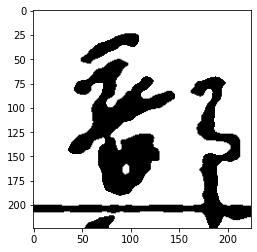

In [44]:
plt.imshow(th3,'gray')

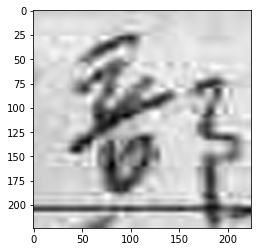

In [27]:
image_g = cv2.imread(aa[12], 0)
image_g = cv2.resize(image_g, (224,224), interpolation=cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(image_g,(5,5), cv2.BORDER_DEFAULT)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

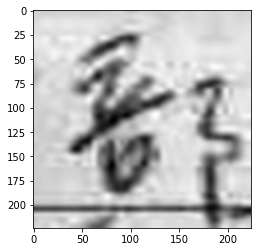

In [36]:
blur = cv2.GaussianBlur(image_g,(5,5), cv2.BORDER_DEFAULT)
plt.imshow(blur,'gray')

In [39]:
cv2.imwrite('C:/Users/bbb50/Desktop/Python/output.jpg', th3)

True

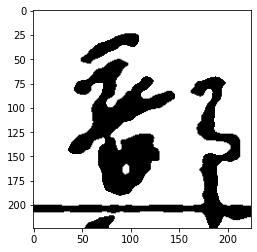

In [38]:
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th3,'gray')

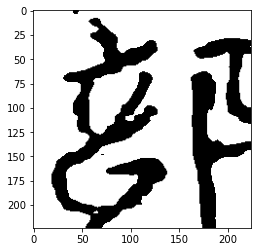

In [18]:
ret3,th3 = cv2.threshold(image_g,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th3,'gray')

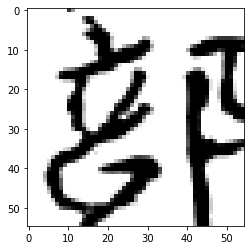

In [277]:
ret3,th3 = cv2.threshold(image_g,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
final = cv2.resize(th3, (55,55), interpolation=cv2.INTER_AREA)
plt.imshow(final,'gray')

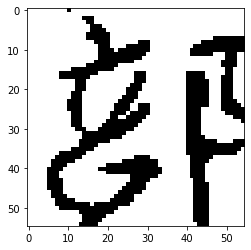

In [278]:
ret4,th4 = cv2.threshold(final,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th4,'gray')

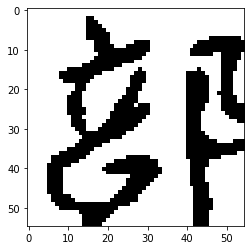

In [280]:
image_g = cv2.imread(aa[50], 0)
image_g = cv2.resize(image_g, (55,55), interpolation=cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(image_g,(3,3), cv2.BORDER_DEFAULT)
ret5,th5 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th5,'gray')

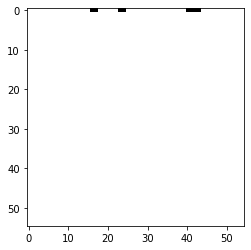

In [125]:
new_img = []
for line in blur:
    new_img.append(np.array(list(map(lambda x: 0 if x < 100 else 255, line))))

new_img = np.array(list(map(lambda x: np.array(x), new_img)))
plt.imshow(new_img,'gray')

In [75]:
blur = cv2.GaussianBlur(image_g,(5,5),0)


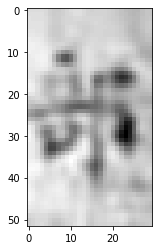

In [76]:
plt.imshow(blur,'gray')

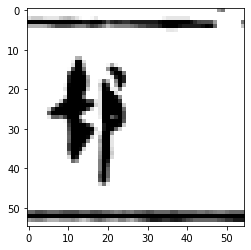

In [262]:
blured1 = cv2.medianBlur(image_g,25)
blured2 = cv2.medianBlur(image_g,301)
divided = np.ma.divide(blured1, blured2).data
normed = np.uint8(255*divided/divided.max())
th, threshed = cv2.threshold(normed, 100, 255, cv2.THRESH_OTSU)
final_threshed = cv2.resize(threshed, (55,55), interpolation=cv2.INTER_AREA)
plt.imshow(final_threshed,'gray')

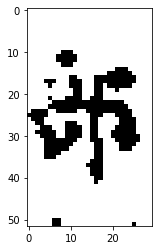

In [109]:
blured1 = cv2.medianBlur(image_g,3)
blured2 = cv2.medianBlur(image_g,51)
divided = np.ma.divide(blured1, blured2).data
normed = np.uint8(255*divided/divided.max())
th, threshed = cv2.threshold(normed, 100, 255, cv2.THRESH_OTSU)
plt.imshow(threshed,'gray')

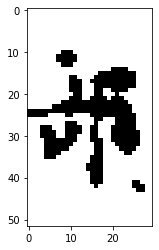

In [106]:
ret3,th3 = cv2.threshold(blur,0,100,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th3,'gray')

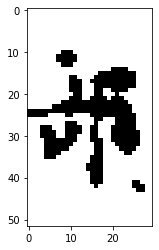

In [107]:
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th3,'gray')

In [96]:
th4 = cv2.adaptiveThreshold(image_g,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,10,2)
plt.imshow(th4,'gray')

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vi271kac\opencv\modules\imgproc\src\thresh.cpp:1677: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


In [59]:
import cv2

image_g = cv2.imread(aa[0], 0) #直接以灰階方式讀取影像



In [61]:
cv2.imshow('Result', image_g )
cv2.waitKey(0)

-1